### This shows first data pre processing steps to clean our data and have them in order for the purpose of our analysis.

In [7]:
## mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
## import data pre-processing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
### file for gas and electricity consumption
filename = '/content/subnational_gas_consumption_statistics_2005-2021 (1).xlsx'
filename2 = '/content/subnational_electricity_consumption_statistics_2005-2021.xlsx'

In [10]:
## The Sheet years
sheets = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
          '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

### for gas data

In [11]:
## merging the sheets in the gas data
gas_df = [pd.read_excel(filename, header=5, sheet_name=sheet) for sheet in sheets]
for i, sheet_name in enumerate(sheets):
    gas_df[i]['Year'] = sheet_name
gas_data = pd.concat(gas_df, ignore_index=True)

In [12]:
gas_data

,Code,Country or region,Local authority,Notes,Number of meters\n(thousands):\nDomestic\n,Number of meters\n(thousands):\nNon-Domestic,Number of meters\n(thousands):\nAll meters,Total consumption\n(GWh):\nDomestic\n,Total consumption\n(GWh):\nNon-Domestic,Total consumption\n(GWh):\nAll meters,Mean consumption\n(kWh per meter):\nDomestic\n,Mean consumption\n(kWh per meter):\nNon-Domestic,Mean consumption\n(kWh per meter):\nAll meters,Year,Median consumption\n(kWh per meter):\nDomestic\n,Median consumption\n(kWh per meter):\nNon-Domestic,Median consumption\n(kWh per meter):\nAll meters,Number of \nnon-consuming meters \n(thousands)
0,NaN,Great Britain,All local authorities,NaN,21594.972,398.187,21993.159,410737.002914,256850.365472,667587.368386,19020.029427,645049.600997,30354.319195,2005,NaN,NaN,NaN,NaN
1,NaN,England,All local authorities,NaN,18781.875,347.502,19129.377,355378.619951,216506.320353,571884.940304,18921.360085,623036.184980,29895.638541,2005,NaN,NaN,NaN,NaN
2,UKC,North East,All local authorities,NaN,1037.403,16.219,1053.622,20710.658157,13952.158200,34662.816357,19963.946660,860235.415254,32898.721132,2005,NaN,NaN,NaN,NaN
3,UKD,North West,All local authorities,NaN,2747.967,48.871,2796.838,53390.873953,35926.287793,89317.161746,19429.226753,735124.875550,31935.050134,2005,NaN,NaN,NaN,NaN
4,UKE,Yorkshire and The Humber,All local authorities,NaN,1989.970,36.997,2026.967,39024.143235,30648.965991,69673.109226,19610.417863,828417.601184,34373.085120,2005,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,S12000045,Scotland,East Dunbartonshire,NaN,45.162,0.448,45.610,751.352927,149.051823,900.404750,16636.839093,332704.961192,19741.388944,2021,14824.638128,125457.472180,14934.778909,0.382
6734,S12000047,Scotland,Fife,[note 1],166.535,1.563,168.098,2259.188199,1441.718436,3700.906635,13565.764754,922404.629400,22016.232309,2021,12113.203392,152177.305916,12189.286322,2.012
6735,S12000048,Scotland,Perth and Kinross,NaN,49.722,0.684,50.406,715.025692,302.421696,1017.447388,14380.180034,442136.983045,20184.644757,2021,12265.369252,158526.640856,12396.512198,0.570
6736,S12000049,Scotland,Glasgow City,NaN,261.199,3.384,264.583,2891.166512,2267.413413,5158.579925,11068.742125,670039.424606,19496.872176,2021,9333.173159,168902.364846,9434.764216,5.359


### electricity data

In [13]:
## merging the sheets in the electricity data
electricity_df = [pd.read_excel(filename2, header=4, sheet_name=sheet) for sheet in sheets]
for i, sheet_name in enumerate(sheets):
    electricity_df[i]['Year'] = sheet_name
electricity_data = pd.concat(electricity_df, ignore_index=True)

In [14]:
electricity_data

,Code,Country or region,Local authority,Number of meters\n(thousands):\nDomestic\n,Number of meters\n(thousands):\nNon-Domestic,Number of meters\n(thousands):\nAll meters,Total consumption\n(GWh):\nDomestic\n,Total consumption\n(GWh):\nNon-Domestic,Total consumption\n(GWh):\nAll meters,Mean consumption\n(kWh per meter):\nDomestic\n,...,Median consumption\n(kWh per meter):\nDomestic Standard,Median consumption\n(kWh per meter):\nDomestic E7,Median consumption\n(kWh per meter):\nAll Domestic\n,Median consumption\n(kWh per meter):\nAll Non-Domestic,Median consumption\n(kWh per meter):\nAll meters,Number of meters\n(thousands):\nDomestic E7,Number of meters\n(thousands):\nAll Domestic,Total consumption\n(GWh):\nAll Domestic,Mean consumption\n(kWh per meter):\nAll Domestic,Median consumption\n(kWh per meter):\nAll Domestic
0,NaN,Great Britain,All local authorities,25948.940,2446.010,28394.950,119424.904276,200889.466430,320314.370706,4602.303766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,England,All local authorities,21929.970,2069.524,23999.494,101267.440603,166681.459923,267948.900526,4617.764666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UKC,North East,All local authorities,1170.117,82.182,1252.299,4548.256908,9348.763511,13897.020419,3887.010366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UKD,North West,All local authorities,2910.574,236.806,3147.380,13177.298721,23114.727527,36292.026248,4527.388316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UKE,Yorkshire and The Humber,All local authorities,2269.004,181.093,2450.097,9803.550540,17032.070641,26835.621181,4320.640484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,S12000045,Scotland,East Dunbartonshire,NaN,NaN,52.049,NaN,NaN,318.384758,NaN,...,2819.00,2809.700000,NaN,6594.00,2858.20,3.582,49.408,169.132893,3423.188411,2818.6
6750,S12000047,Scotland,Fife,NaN,NaN,201.818,NaN,NaN,1442.403379,NaN,...,2507.45,2460.500000,NaN,6850.10,2557.15,15.191,188.469,589.970746,3130.333084,2505.5
6751,S12000048,Scotland,Perth and Kinross,NaN,NaN,90.533,NaN,NaN,679.206896,NaN,...,2730.00,4751.200000,NaN,7241.15,2959.80,12.598,81.817,323.537977,3954.410173,2858.7
6752,S12000049,Scotland,Glasgow City,NaN,NaN,363.128,NaN,NaN,2451.058480,NaN,...,2096.00,2074.885276,NaN,7969.00,2157.70,56.953,338.145,897.944303,2655.500756,2094.2


## address the columns head

This is used to correct some errorneous column name.

In [15]:
gas_data.columns = gas_data.columns.str.replace('\n', '')

In [16]:
electricity_data.columns = electricity_data.columns.str.replace('\n', '')

### gas and electricity data

In [17]:
print(electricity_data.shape)
print(gas_data.shape)

(6754, 36)
(6738, 18)


###### Data set merging

In [18]:
## Joining the gas and electricity data based on the same column name
col_to_use = electricity_data.columns[electricity_data.columns.isin(gas_data.columns)]

In [19]:
df1 = electricity_data[col_to_use]
df2 = gas_data[col_to_use]

In [20]:
### give a tag to both data source
df1['tag'] = 'electricity'
df2['tag'] = 'gas'

<ipython-input-20-366c3b4fc391>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tag'] = 'electricity'
<ipython-input-20-366c3b4fc391>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tag'] = 'gas'


### join both electricity and gas data together.

In [21]:
data = pd.concat([df1, df2])

In [22]:
print(data.shape)

(13492, 15)


### Data Cleaning

In [23]:
print(data.shape)

(13492, 15)


In [24]:
data[data.duplicated()].shape[0]

0

In [25]:
## check missing values
data.isnull().sum()

Code                                              42
Country or region                                 33
Local authority                                    0
Number of meters(thousands):Domestic            3856
Number of meters(thousands):Non-Domestic        3856
Number of meters(thousands):All meters             0
Total consumption(GWh):Domestic                 3856
Total consumption(GWh):Non-Domestic             3856
Total consumption(GWh):All meters                  0
Mean consumption(kWh per meter):Domestic        3910
Mean consumption(kWh per meter):Non-Domestic    3910
Mean consumption(kWh per meter):All meters        54
Year                                               0
Median consumption(kWh per meter):All meters    5822
tag                                                0
dtype: int64

### Analysis of the missing values data

### Checking missing values percentage

In [26]:
## Getting the percentage of missing values by each feature in the dataset
ms = (data.isnull().sum()/len(data)*100).reset_index().rename(columns={'index':'feature', 0:'missing percent'})

In [27]:
### filter the missing values percentage (removing all feature without missing values)
feature_missing = ms[ms['missing percent'] > 0].sort_values(by='missing percent')

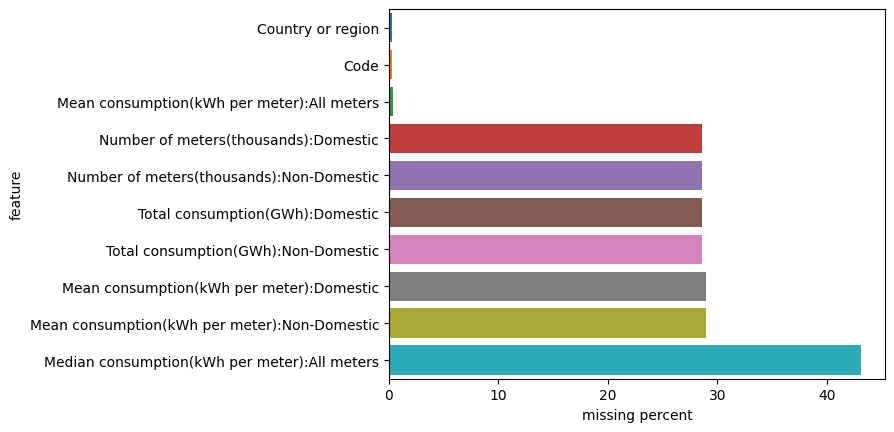

In [28]:
sns.barplot(x='missing percent', y='feature', data=feature_missing, orient="h");

### Drop > 30 percent feature

In [29]:
to_drop = 'Median consumption(kWh per meter):All meters'

In [30]:
data = data.drop(to_drop, axis=1)

## Filling other missing values

* The categorical missing feature are filled with **Unknown**

* The numerical missing feature are fiiled with **KNN**

In [31]:
data['Code'] = data['Code'].fillna(value='unknown')
data['Country or region'] = data['Country or region'].fillna(value='unknown')

KNN IMPUTER

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close (https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [33]:
nms = ['Mean consumption(kWh per meter):All meters',
       'Number of meters(thousands):Domestic',
       'Number of meters(thousands):Non-Domestic',
       'Total consumption(GWh):Domestic',
       'Total consumption(GWh):Non-Domestic',
       'Mean consumption(kWh per meter):Domestic',
       'Mean consumption(kWh per meter):Non-Domestic']

In [34]:
imputer = IterativeImputer(max_iter=100, random_state=0)

In [35]:
knn_imputer = pd.DataFrame(imputer.fit_transform(data[nms]), columns=data[nms].columns)

In [36]:
## drop the missing values
data = data.dropna(axis=1).reset_index(drop=True)

In [37]:
### merging the data after knn imputer
data = pd.concat([data, knn_imputer], axis=1)

In [38]:
data.isnull().sum()

Code                                            0
Country or region                               0
Local authority                                 0
Number of meters(thousands):All meters          0
Total consumption(GWh):All meters               0
Year                                            0
tag                                             0
Mean consumption(kWh per meter):All meters      0
Number of meters(thousands):Domestic            0
Number of meters(thousands):Non-Domestic        0
Total consumption(GWh):Domestic                 0
Total consumption(GWh):Non-Domestic             0
Mean consumption(kWh per meter):Domestic        0
Mean consumption(kWh per meter):Non-Domestic    0
dtype: int64

### EDA

In [39]:
data.head()

,Code,Country or region,Local authority,Number of meters(thousands):All meters,Total consumption(GWh):All meters,Year,tag,Mean consumption(kWh per meter):All meters,Number of meters(thousands):Domestic,Number of meters(thousands):Non-Domestic,Total consumption(GWh):Domestic,Total consumption(GWh):Non-Domestic,Mean consumption(kWh per meter):Domestic,Mean consumption(kWh per meter):Non-Domestic
0,unknown,Great Britain,All local authorities,28394.950,320314.370706,2005,electricity,11280.680921,25948.940,2446.010,119424.904276,200889.466430,4602.303766,82129.454266
1,unknown,England,All local authorities,23999.494,267948.900526,2005,electricity,11164.772913,21929.970,2069.524,101267.440603,166681.459923,4617.764666,80540.964938
2,UKC,North East,All local authorities,1252.299,13897.020419,2005,electricity,11097.206354,1170.117,82.182,4548.256908,9348.763511,3887.010366,113756.826450
3,UKD,North West,All local authorities,3147.380,36292.026248,2005,electricity,11530.868929,2910.574,236.806,13177.298721,23114.727527,4527.388316,97610.396388
4,UKE,Yorkshire and The Humber,All local authorities,2450.097,26835.621181,2005,electricity,10952.881123,2269.004,181.093,9803.550540,17032.070641,4320.640484,94051.512983


In [40]:
print(data.shape)

(13492, 14)


In [41]:
#data.to_csv('energy_consumption_data.csv', index=False)

**Question 1**

what is the year distribution?

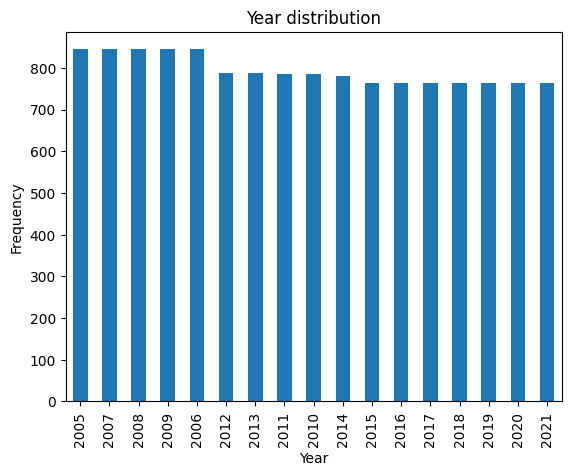

In [42]:
plt.title('Year distribution')
data['Year'].value_counts().plot(kind='bar');
plt.xlabel('Year');
plt.ylabel('Frequency');

**Question 2**

The top 10 region

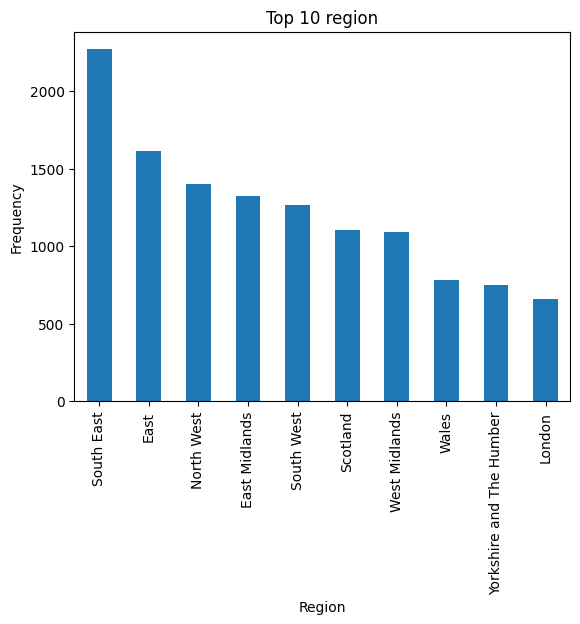

In [43]:
plt.title('Top 10 region')
data['Country or region'].value_counts()[:10].plot(kind='bar');
plt.xlabel('Region');
plt.ylabel('Frequency');

**Question 3**

Number of meters distribution

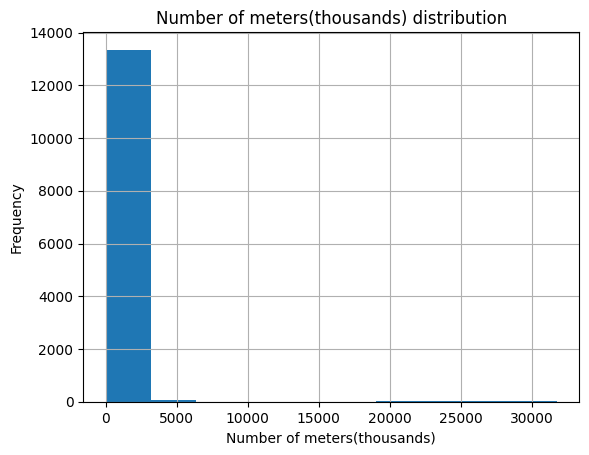

In [44]:
plt.title('Number of meters(thousands) distribution')
data['Number of meters(thousands):All meters'].hist(bins=10);
plt.xlabel('Number of meters(thousands)');
plt.ylabel('Frequency');

**Question 4**

Total consumption distribution

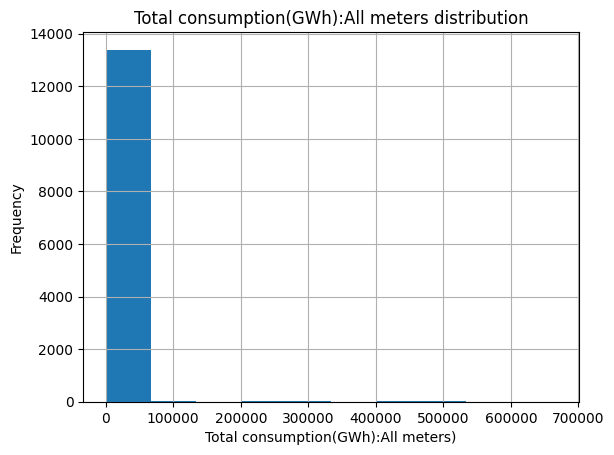

In [45]:
plt.title('Total consumption(GWh):All meters distribution')
data['Total consumption(GWh):All meters'].hist(bins=10);
plt.xlabel('Total consumption(GWh):All meters)');
plt.ylabel('Frequency');

In [46]:
data['Total consumption(GWh):All meters'].describe()

count     13492.000000
mean       4404.546878
std       31239.377296
min           0.000000
25%         531.959898
50%         835.576536
75%        1374.875315
max      667587.368386
Name: Total consumption(GWh):All meters, dtype: float64

**Question 5**

Average Energy consumption per each region?

In [47]:
data.columns

Index(['Code', 'Country or region', 'Local authority',
       'Number of meters(thousands):All meters',
       'Total consumption(GWh):All meters', 'Year', 'tag',
       'Mean consumption(kWh per meter):All meters',
       'Number of meters(thousands):Domestic',
       'Number of meters(thousands):Non-Domestic',
       'Total consumption(GWh):Domestic',
       'Total consumption(GWh):Non-Domestic',
       'Mean consumption(kWh per meter):Domestic',
       'Mean consumption(kWh per meter):Non-Domestic'],
      dtype='object')

In [48]:
avg_ec = data.groupby('Country or region')['Total consumption(GWh):All meters'].mean().reset_index()

In [49]:
avg_ec = avg_ec.sort_values(by='Total consumption(GWh):All meters', ascending=False)


In [50]:
avg_ec

,Country or region,Total consumption(GWh):All meters
5,Great Britain,430228.354080
6,Great Britain (inc unallocated),385690.240400
3,England and Wales (inc unallocated),349703.319714
2,England,349557.335137
22,Yorkshire and the Humber,55027.282972
14,Scotland (inc unallocated),35986.920686
9,London,4191.272993
21,Yorkshire and The Humber,3509.415052
8,Inner London,3204.001513
7,Great Britain (unallocated),2937.739857


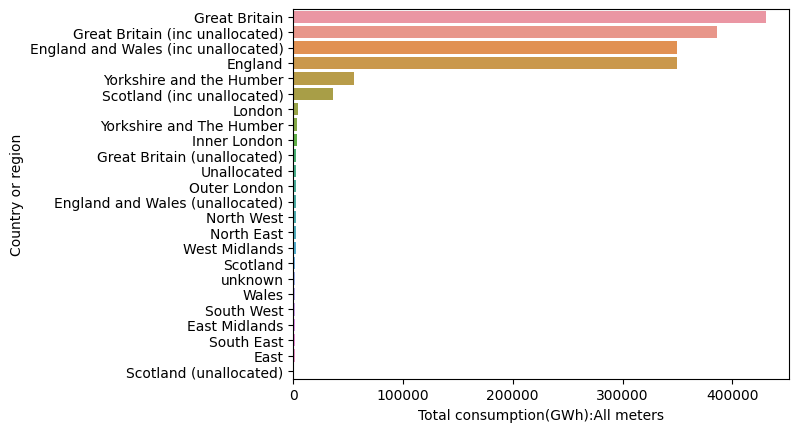

In [51]:
sns.barplot(data=avg_ec,x='Total consumption(GWh):All meters', y='Country or region');

**Question 6**

What is the correlation between number meters and total consumption

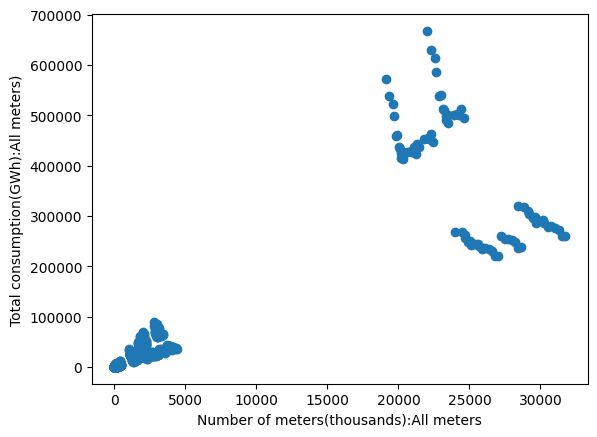

In [52]:
plt.scatter(data=data, x='Number of meters(thousands):All meters', y='Total consumption(GWh):All meters',);
plt.xlabel('Number of meters(thousands):All meters');
plt.ylabel('Total consumption(GWh):All meters)');

### Data Visualization

### Total Energy consumption visualze with respect to Gas and Electricity.


In [53]:
import scipy.stats as stats

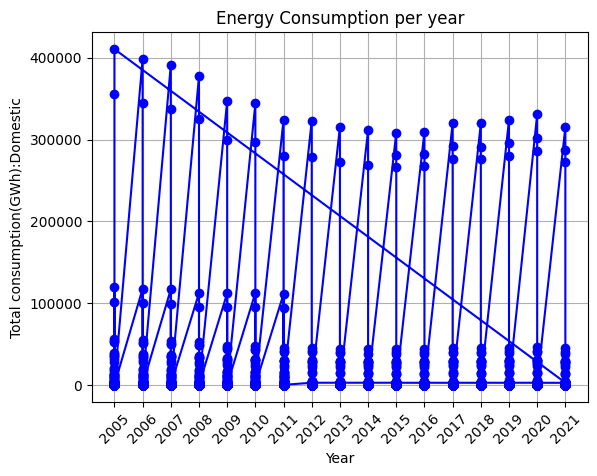

In [90]:
plt.plot(data['Year'], data['Total consumption(GWh):Domestic'],marker='o', linestyle='-', color='blue');
plt.title('Energy Consumption per year')
plt.grid(True);
plt.xticks(rotation=45);
plt.xlabel('Year');
plt.ylabel('Total consumption(GWh):Domestic')
plt.show();

We observed that the pattern of energy consumption seems to have irregular variation.


### Average Total consumption energy consumption per year by tag

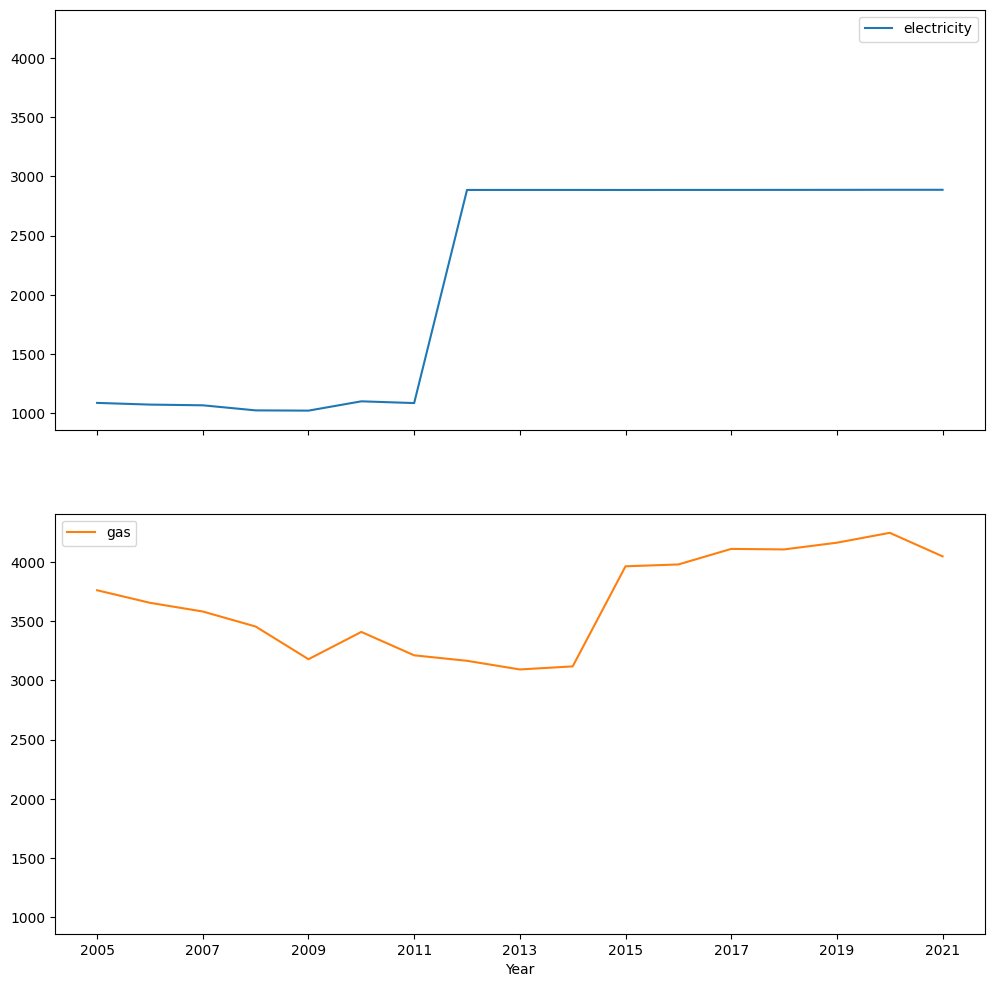

In [92]:
pd.pivot_table(data=data,values='Total consumption(GWh):Domestic',columns='tag', index='Year').plot(subplots=True,figsize=(12,12),layout=(2,1),sharey=True);

### Total Domestic consumption energy consumption per region trend by year



In [87]:
order = data.groupby('Country or region')['Total consumption(GWh):Domestic'].mean().sort_values(ascending=False).index

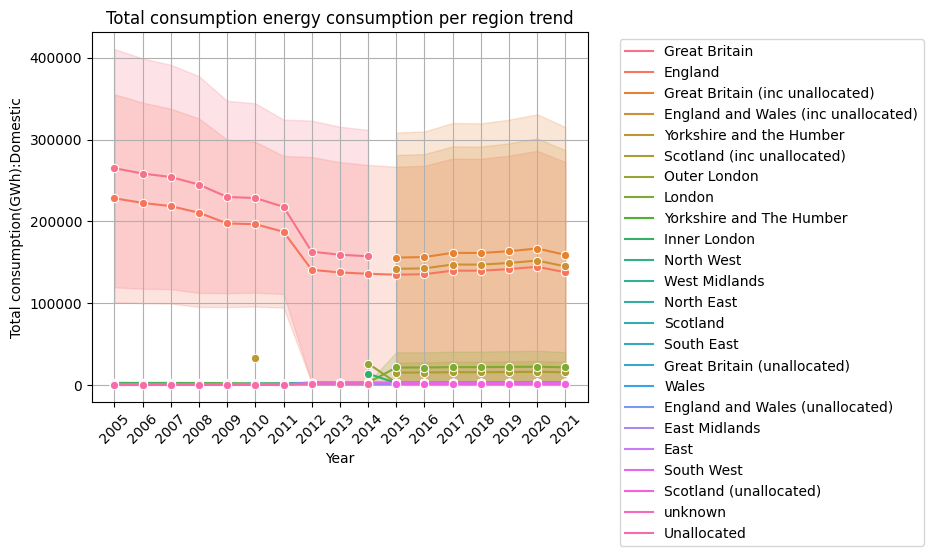

In [88]:
sns.lineplot(x='Year', y='Total consumption(GWh):Domestic', hue='Country or region', data=data, marker='o', hue_order=order);
plt.title('Total consumption energy consumption per region trend')
plt.grid(True);
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

### The top 4 region energy consumption per year

In [58]:
order

Index(['Great Britain', 'Great Britain (inc unallocated)',
       'England and Wales (inc unallocated)', 'England',
       'Yorkshire and the Humber', 'Scotland (inc unallocated)', 'London',
       'Yorkshire and The Humber', 'Inner London',
       'Great Britain (unallocated)', 'Unallocated', 'Outer London',
       'England and Wales (unallocated)', 'North West', 'North East',
       'West Midlands', 'Scotland', 'unknown', 'Wales', 'South West',
       'East Midlands', 'South East', 'East', 'Scotland (unallocated)'],
      dtype='object', name='Country or region')

In [59]:
top_4_region = data[data['Country or region'].isin(order[:4])].reset_index(drop=True)

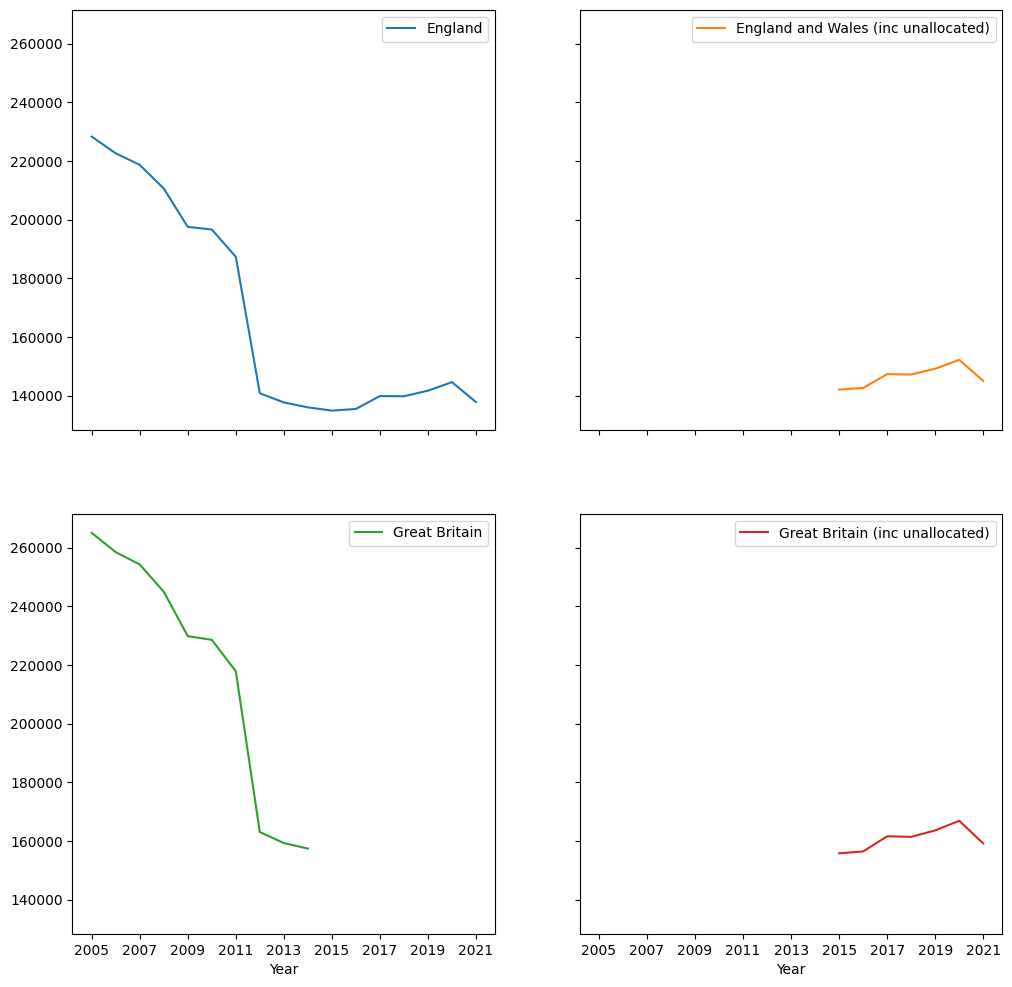

In [93]:
pd.pivot_table(data=top_4_region,values='Total consumption(GWh):Domestic',columns='Country or region', index='Year').plot(subplots=True,figsize=(12,12),layout=(2,2),sharey=True);

In [63]:
lowest_4_region = data[data['Country or region'].isin(order[-4:])].reset_index(drop=True)

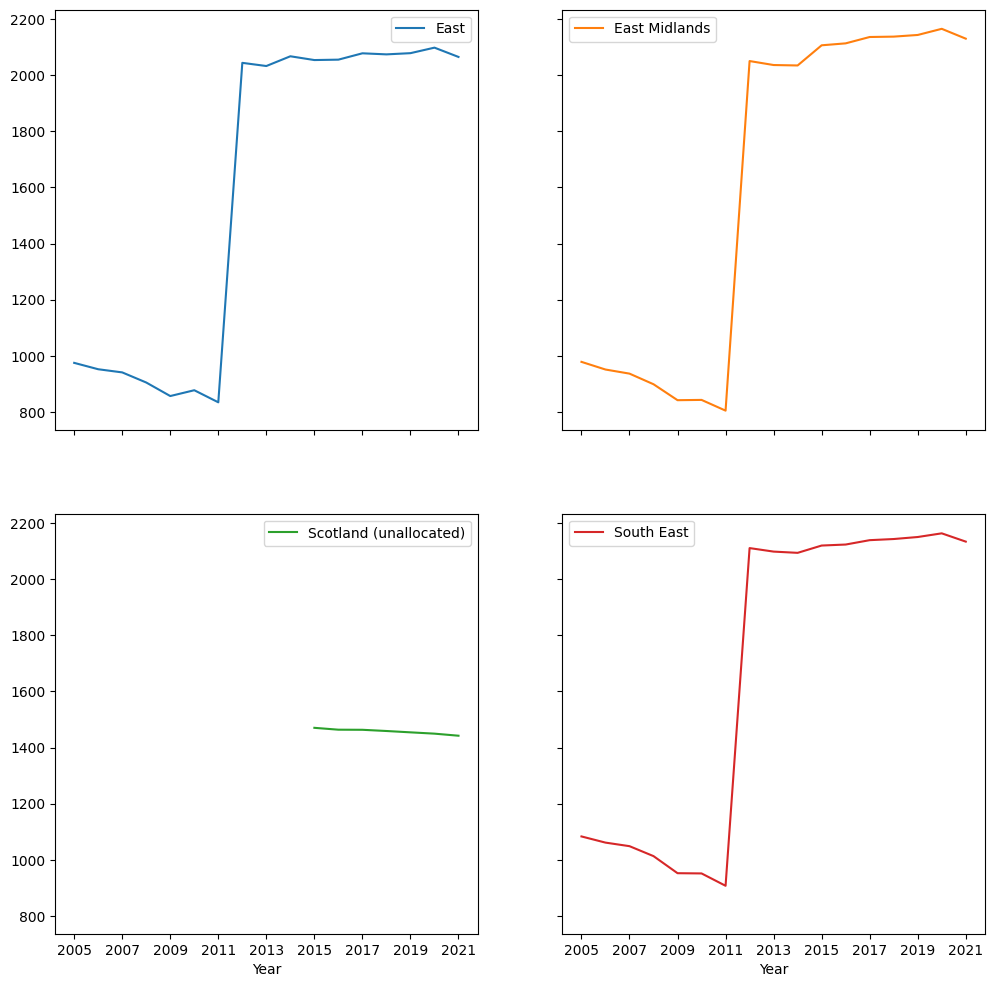

In [95]:
pd.pivot_table(data=lowest_4_region,values='Total consumption(GWh):Domestic',columns='Country or region', index='Year').plot(subplots=True,figsize=(12,12),layout=(2,2),sharey=True);

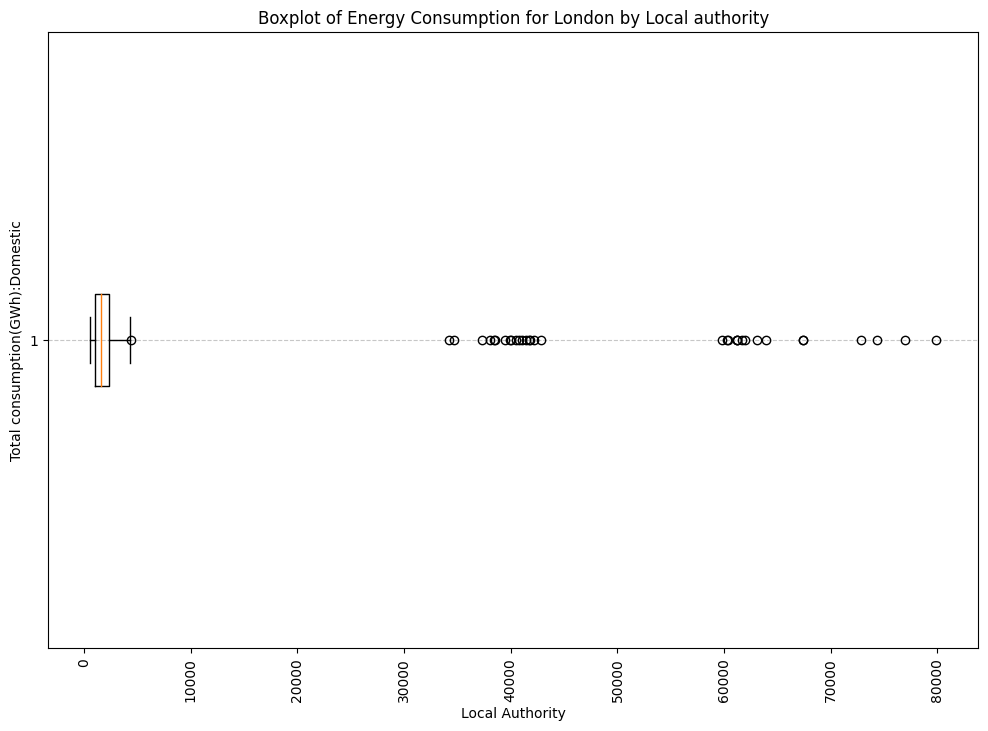

In [96]:
# Filter the dataset for a specific region (e.g., "London")
region_to_analyze = "London"
region_data = data[data['Country or region'] == region_to_analyze]

# Create a boxplot
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title(f'Boxplot of Energy Consumption for {region_to_analyze} by Local authority')
plt.xlabel('Local Authority')
plt.ylabel('Total consumption(GWh):Domestic')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Create the boxplot using Matplotlib
plt.boxplot(region_data['Total consumption(GWh):All meters'], vert=False)
plt.show()


### Total Consumption by tag

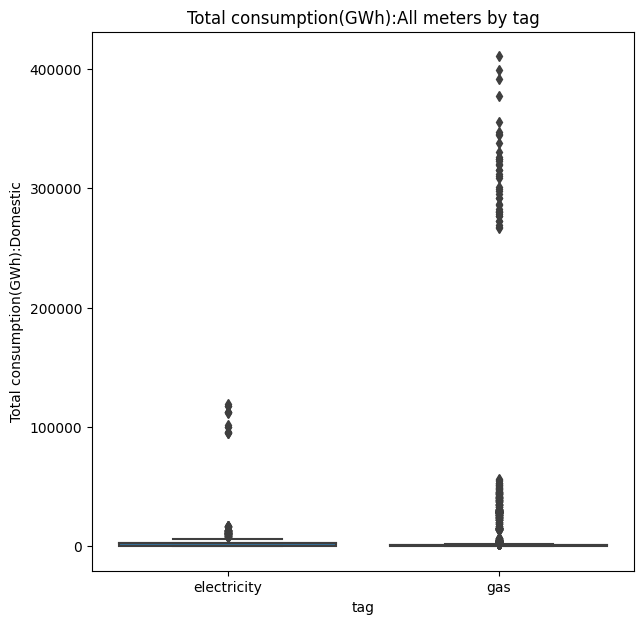

In [97]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=data, x='tag', y='Total consumption(GWh):Domestic')
ax.set_title('Total consumption(GWh):All meters by tag')
plt.show();

In [103]:
corr_feat = data.corr(numeric_only=True)['Total consumption(GWh):All meters'].reset_index().sort_values(by='Total consumption(GWh):All meters', ascending=False)[1:]

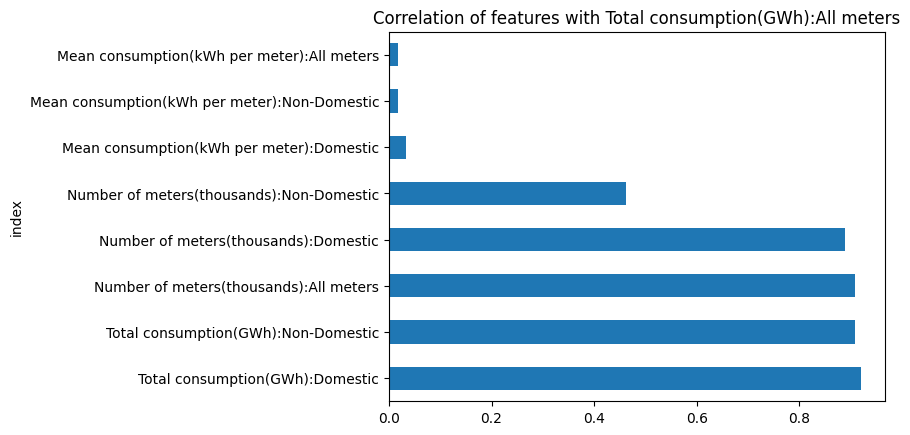

In [104]:
corr_feat.set_index('index')['Total consumption(GWh):All meters'].plot(kind='barh');
plt.title('Correlation of features with Total consumption(GWh):All meters');

### Pairplot

This is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

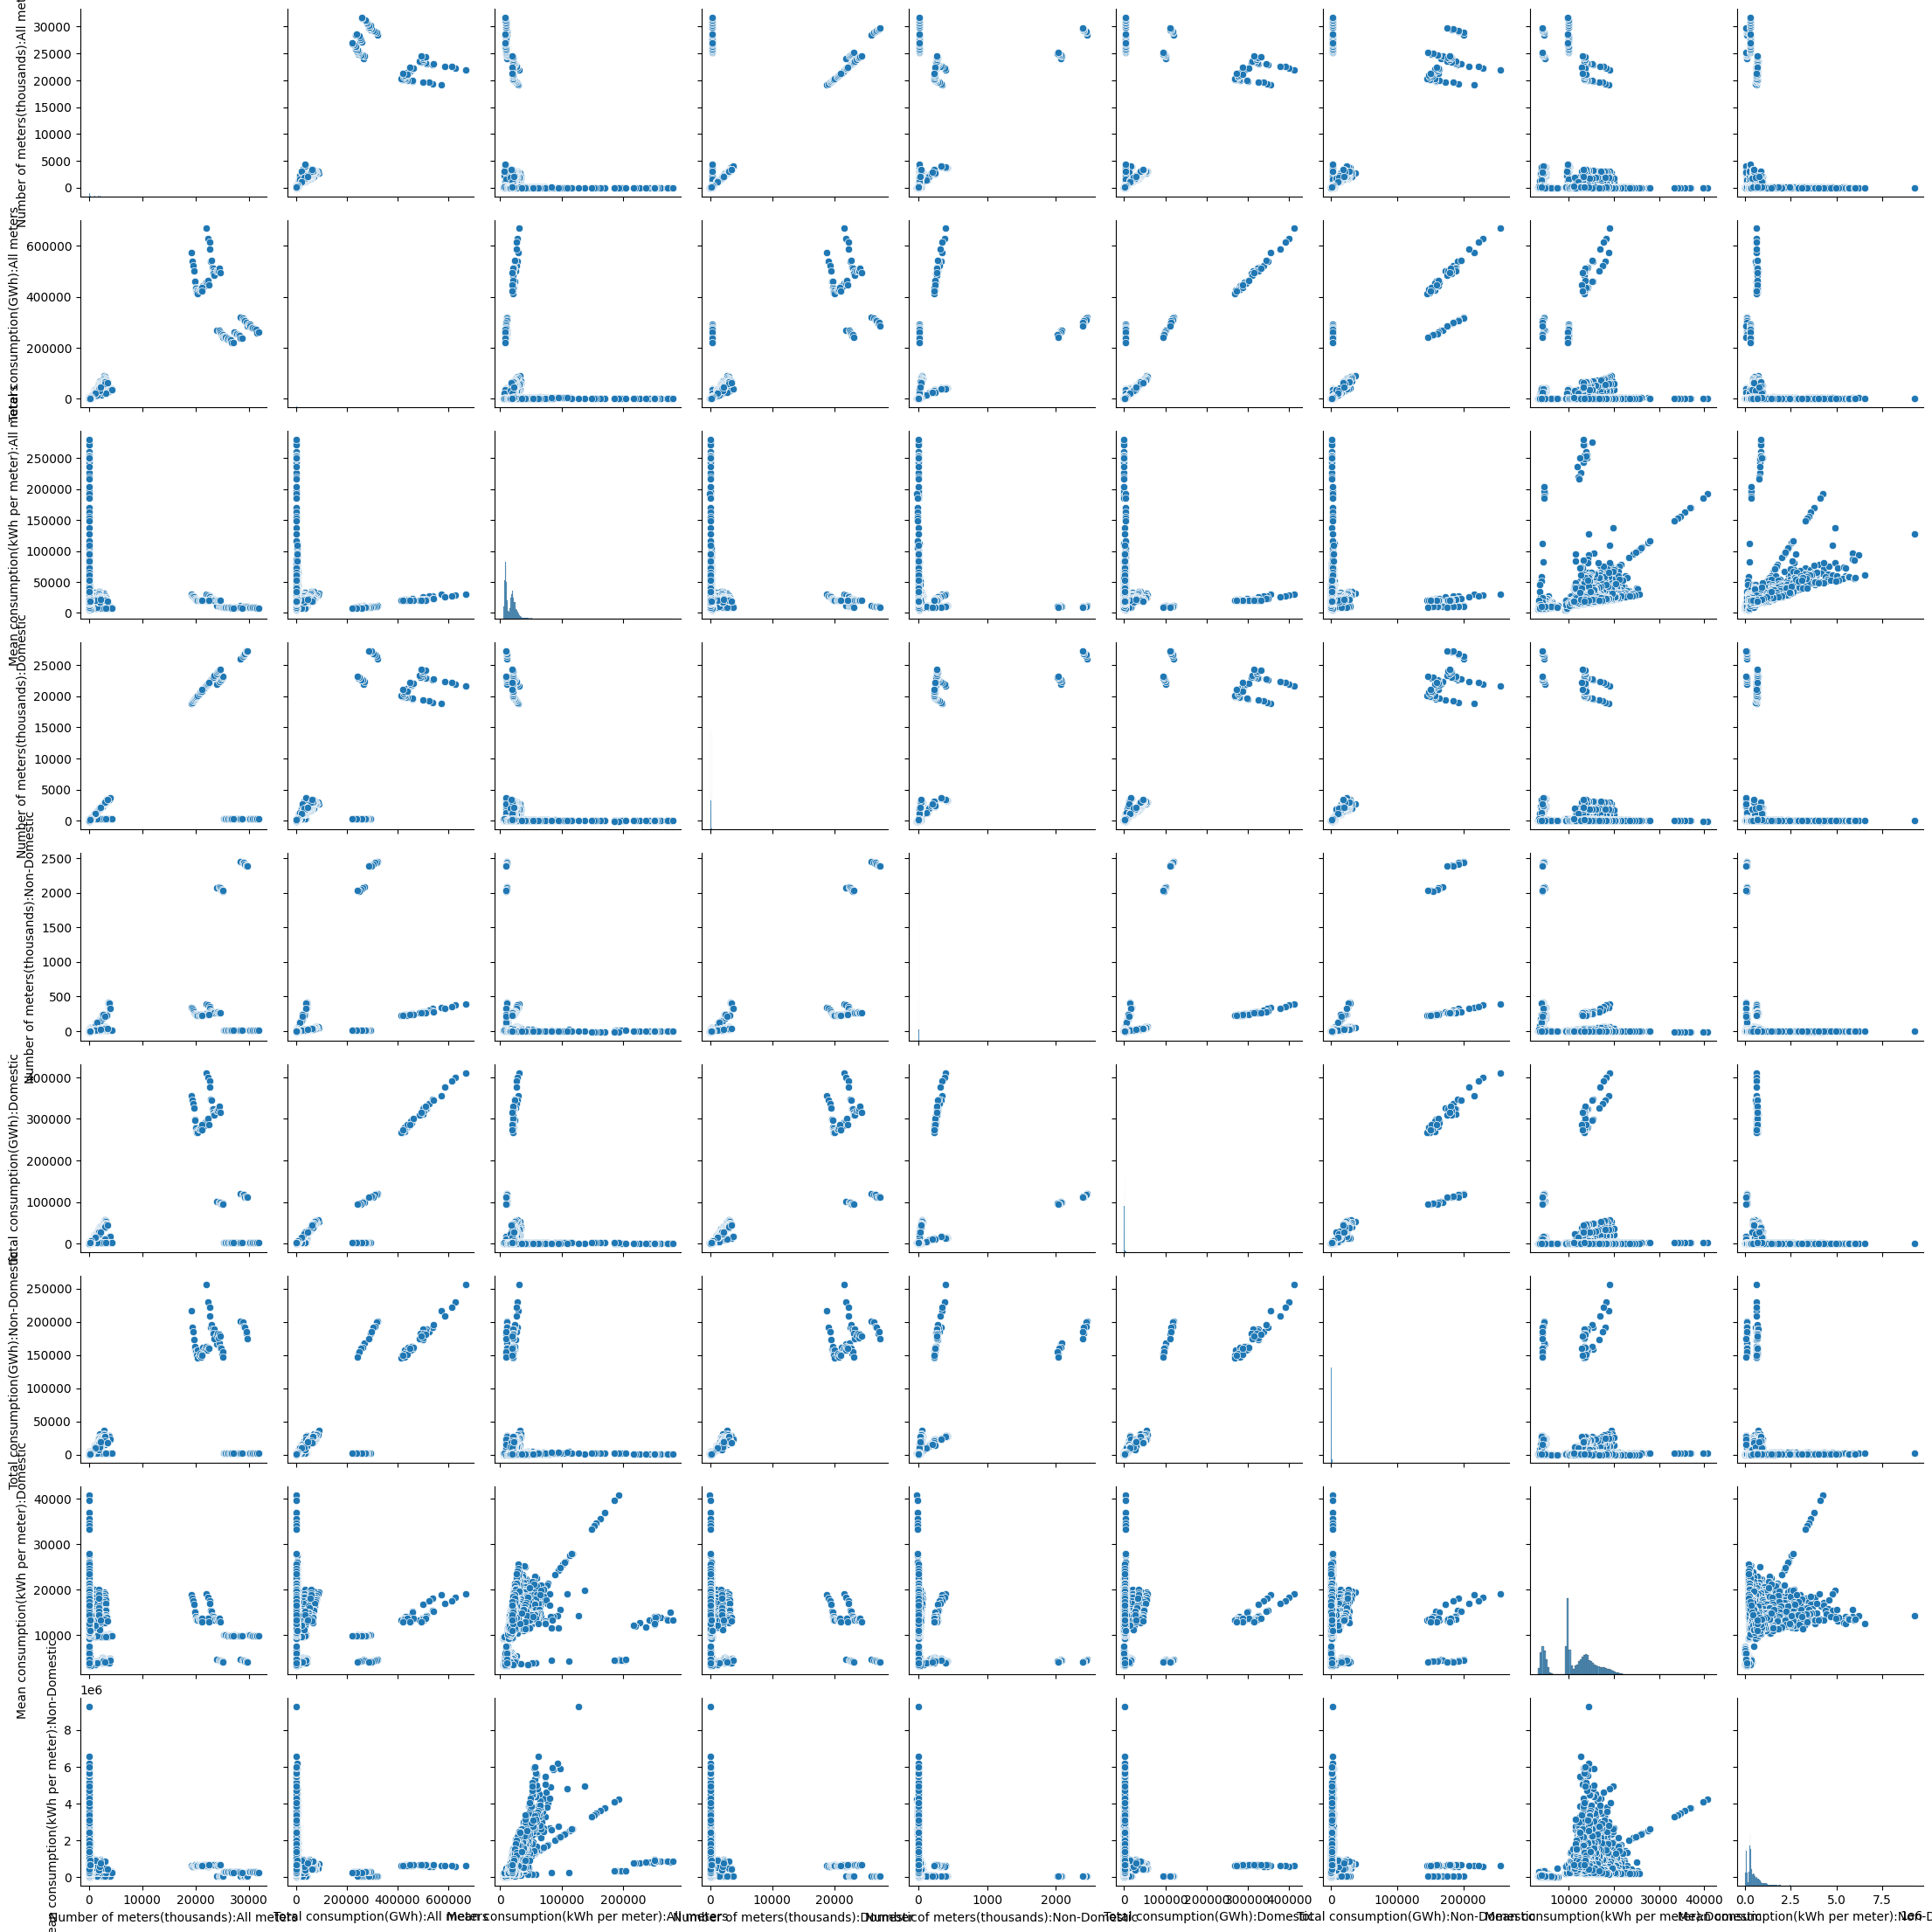

In [105]:
sns.pairplot(data)
plt.show()

### Statistical Analysis


* A t test is a statistical test that is used to compare the means of two groups.

* It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.


### T-test to compare means of groups of electricity and gas by total consumption

In [106]:
# Separate data for 'Gas' and 'Electricity'
gas_data = data[data['tag'] == 'gas']['Total consumption(GWh):All meters']
electricity_data = data[data['tag'] == 'electricity']['Total consumption(GWh):All meters']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(gas_data, electricity_data)

# Compare the p-value with the significance level (e.g., 0.05) to make a decision
print(p_value)
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis: Means are significantly different.")
else:
    print("Fail to reject the null hypothesis: Means are not significantly different.")


9.654129034326812e-07
Reject the null hypothesis: Means are significantly different.


### Analysis of Variance Test to compare year and total consumption

In [107]:
years = data['Year'].unique()
year_groups = [data[data['Year'] == year]['Total consumption(GWh):All meters'] for year in years]

f_statistic, p_value = stats.f_oneway(*year_groups)
significance_level = 0.05
print(p_value)
if p_value < significance_level:
    print("Reject the null hypothesis: Total consumption(GWh):All meters means are significantly different across years.")
else:
    print("Fail to reject the null hypothesis: Total consumption(GWh):All meters means are not significantly different across years.")

0.9998519552037163
Fail to reject the null hypothesis: Total consumption(GWh):All meters means are not significantly different across years.


### Correlation Staitsical test

In [108]:
correlation_coefficient, p_value = stats.pearsonr(data['Total consumption(GWh):All meters'], data['Total consumption(GWh):Domestic'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")
if p_value < 0.05:
    if correlation_coefficient > 0:
        print("There is a significant positive correlation between Total consumption(GWh):All meters and Total consumption(GWh):Domestic.")
    elif correlation_coefficient < 0:
        print("There is a significant negative correlation between Total consumption(GWh):All meters and Total consumption(GWh):Domestic.")
else:
    print("There is no significant correlation between Total consumption(GWh):All meters and Total consumption(GWh):Domestic.")

Pearson Correlation Coefficient: 0.9205268891073382
P-Value: 0.0
There is a significant positive correlation between Total consumption(GWh):All meters and Total consumption(GWh):Domestic.


### Data Transformation

In [109]:
data_copy = data.copy()

In [110]:
## drop the code column
data = data.drop('Code', axis=1)

In [111]:
### one hot encoding for country or region and tag
data = pd.get_dummies(data, columns=['Country or region', 'tag'])

In [112]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Local authority'] = lb.fit_transform(data['Local authority'])

### cross validation

In [113]:
## convert year from string to integer
data['Year'] = data['Year'].astype(int)

In [114]:
data.rename(columns={'Total consumption(GWh):All meters': 'energy_consumption',
            'Number of meters(thousands):All meters':'Number_of_meters(thousands)'
                     }, inplace=True)

In [115]:
train = data[data['Year'] <=2020].reset_index(drop=True) ## 2005-2020 training set
test = data[data['Year'] >2020].reset_index(drop=True) ## 2021 test set

In [116]:
target_col = 'energy_consumption'
X_train = train.drop(target_col, axis=1)
y_train = train[target_col]
X_test = test.drop(target_col, axis=1)
y_test = test[target_col]

In [117]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12728, 36)
(764, 36)
(12728,)
(764,)


### Machine Learning models

In [118]:
# Metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [119]:
## install catboost on colab
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [121]:
class_models = {
    'lr':{'model':LinearRegression()},
    'rf':{'model':RandomForestRegressor()},
    'Catboost':{'model':CatBoostRegressor()},
    'xgboost':{'model': XGBRegressor()},
    }

In [122]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train)
    y_test_pred = fitted_model.predict(X_test)
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['rmse_test'] =\
    metrics.mean_squared_error(y_test, y_test_pred,squared=False)

Learning rate set to 0.061197
0:	learn: 29606.5489229	total: 80.6ms	remaining: 1m 20s
1:	learn: 28093.6445774	total: 85.5ms	remaining: 42.7s
2:	learn: 26728.2608958	total: 90.8ms	remaining: 30.2s
3:	learn: 25358.5606331	total: 96.6ms	remaining: 24s
4:	learn: 24079.9227493	total: 101ms	remaining: 20.1s
5:	learn: 22908.6575067	total: 107ms	remaining: 17.6s
6:	learn: 21783.4808585	total: 111ms	remaining: 15.7s
7:	learn: 20680.7309139	total: 129ms	remaining: 15.9s
8:	learn: 19724.2314701	total: 138ms	remaining: 15.2s
9:	learn: 18720.0889130	total: 155ms	remaining: 15.3s
10:	learn: 17824.9522551	total: 180ms	remaining: 16.2s
11:	learn: 16971.4769845	total: 197ms	remaining: 16.2s
12:	learn: 16126.2685064	total: 217ms	remaining: 16.5s
13:	learn: 15343.2653235	total: 228ms	remaining: 16.1s
14:	learn: 14636.9656241	total: 238ms	remaining: 15.7s
15:	learn: 13946.4794307	total: 251ms	remaining: 15.5s
16:	learn: 13280.2141535	total: 262ms	remaining: 15.1s
17:	learn: 12678.0235230	total: 279ms	rema

In [123]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[[
'rmse_test']]

In [124]:
score = class_metrics.sort_values(by='rmse_test')

In [125]:
score = score.reset_index().rename(columns={'index':'models'})

In [126]:
score

,models,rmse_test
0,Catboost,606.285573
1,rf,735.359656
2,xgboost,755.783086
3,lr,1636.602516


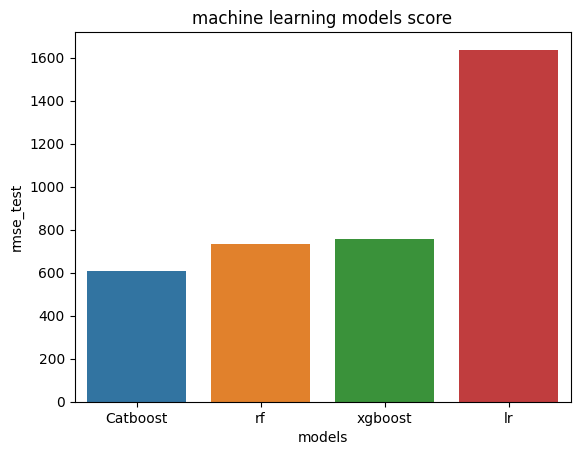

In [127]:
sns.barplot(data=score, x='models', y='rmse_test');
plt.title('machine learning models score');

### Linear Regression

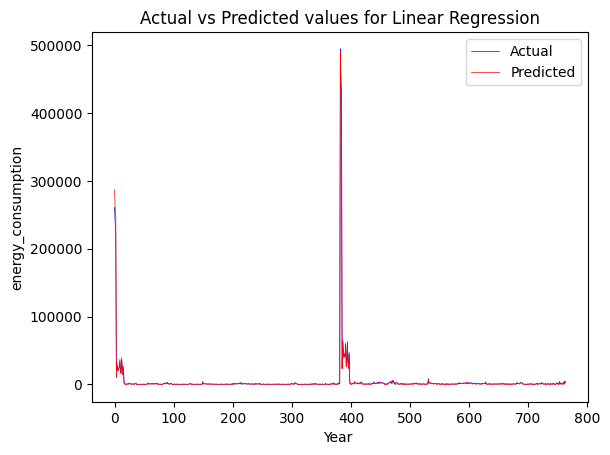

In [128]:
plt.plot(y_test, 'b',  markersize=2, linewidth=0.5)
plt.plot(class_models['lr']['preds'], 'r', markersize=2, linewidth=0.5)

plt.title('Actual vs Predicted values for Linear Regression')

plt.ylabel('energy_consumption')
plt.xlabel('Year ')
plt.legend(['Actual', 'Predicted'], loc='upper right')


plt.show()

### Random forest

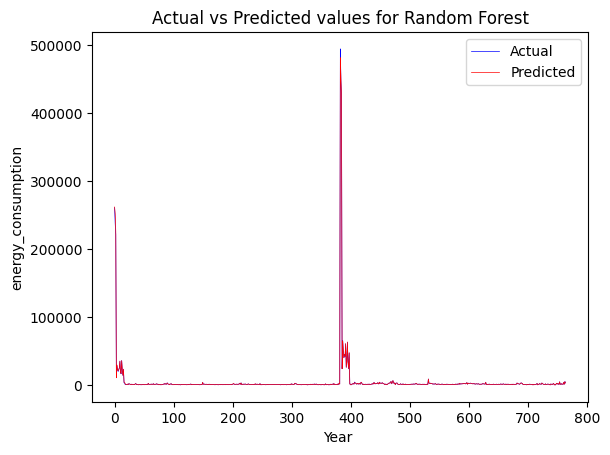

In [129]:
plt.plot(y_test, 'b',  markersize=2, linewidth=0.5)
plt.plot(class_models['rf']['preds'], 'r', markersize=2, linewidth=0.5)

plt.title('Actual vs Predicted values for Random Forest')

plt.ylabel('energy_consumption')
plt.xlabel('Year ')
plt.legend(['Actual', 'Predicted'], loc='upper right')


plt.show()

### Xgboost

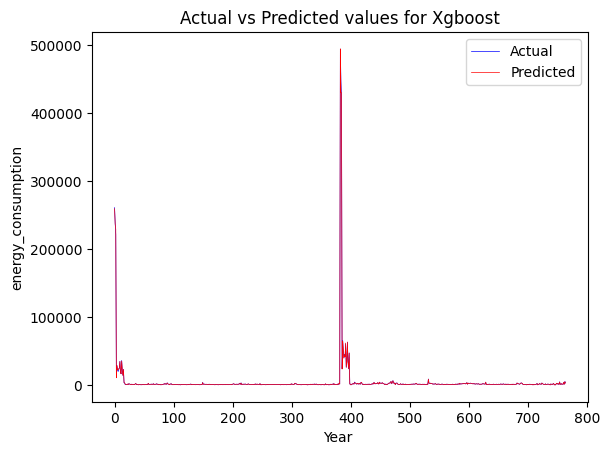

In [130]:
plt.plot(y_test, 'b',  markersize=2, linewidth=0.5)
plt.plot(class_models['xgboost']['preds'], 'r', markersize=2, linewidth=0.5)

plt.title('Actual vs Predicted values for Xgboost')

plt.ylabel('energy_consumption')
plt.xlabel('Year ')
plt.legend(['Actual', 'Predicted'], loc='upper right')


plt.show()

## CATBOOST

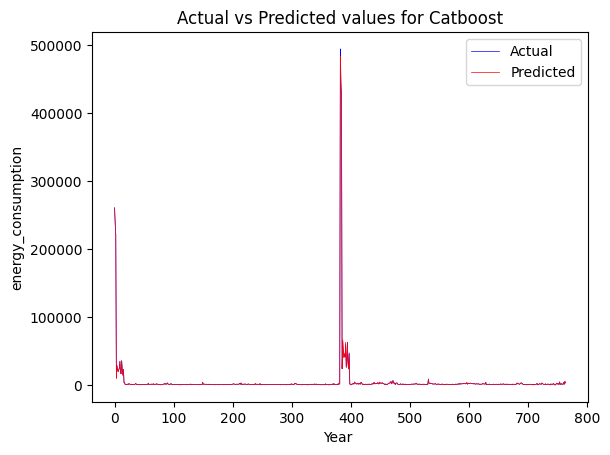

In [131]:
plt.plot(y_test, 'b',  markersize=2, linewidth=0.5)
plt.plot(class_models['Catboost']['preds'], 'r', markersize=2, linewidth=0.5)

plt.title('Actual vs Predicted values for Catboost')

plt.ylabel('energy_consumption')
plt.xlabel('Year ')
plt.legend(['Actual', 'Predicted'], loc='upper right')


plt.show()

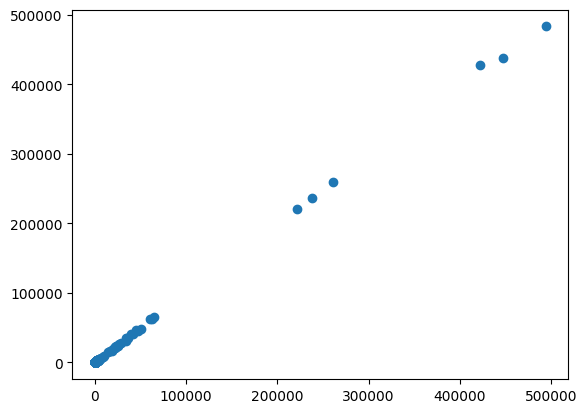

In [132]:
plt.scatter(x=y_test, y=class_models['Catboost']['preds']);